Le but de cette étude est de comprendre comment les graphe représentant des réseaux routier sont formés afin de pouvoir les reproduires. En effet, en plus de tester nos algorythmes sur des graphes de vraies villes, nous voulons pouvoir générer des graphes de villes fictives afin de pouvoir tester nos algorythmes sur des graphes dont nous pouvons spécifier certaines caractéristiques. Cela nous permettra d'approfondir les situation dans lesquelles nos algorythmes sont efficaces et celles dans lesquelles ils ne le sont pas.

Pour ce faire, nous avons donc récupérer des données sur les réseaux routiers de plusieurs villes de toutes tailles que nous avons ensuite traité afin de ne garder que les données qui nous intéressent.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Sources/graph_info.csv", sep=",")
df.head()

,map_name,nodes_number,edges_number,oneway_edges_number,twoway_edges_number,edges_without_speed_number,edges_with_speed_number,max_speed,min_speed,average_speed
0,map_albert,779,1039,189,850,878,161,80,30,54.968944
1,map_alsace_est,3366,4448,498,3950,3946,502,110,20,40.717131
2,map_alsace_vosges,4725,5820,198,5622,5571,249,110,20,50.843373
3,map_amiens,9665,12849,3378,9471,9921,2928,110,10,41.593238
4,map_angers,17716,22129,4687,17442,14770,7359,110,10,37.673597


In [41]:
df["ratio_oneway"] = df["oneway_edges_number"] / df["edges_number"]

In [42]:
#info statistique sur ratio_oneway
print(df["ratio_oneway"].describe())

count    51.000000
mean      0.198368
std       0.084173
min       0.026207
25%       0.147751
50%       0.196327
75%       0.245917
max       0.476053
Name: ratio_oneway, dtype: float64


In [36]:
#vitesse moyenne et écart type de la colonne average_speed
mean_speed = df['average_speed'].mean()
std_speed = df['average_speed'].std()
print("Vitesse moyenne : ", mean_speed)
print("Ecart type : ", std_speed)

Vitesse moyenne :  41.75432885050983
Ecart type :  7.824750314255482


In [37]:
df.sort_values(by=['nodes_number'], inplace=True)
df

,map_name,nodes_number,edges_number,oneway_edges_number,twoway_edges_number,edges_without_speed_number,edges_with_speed_number,max_speed,min_speed,average_speed
10,map_bignoux,156,183,21,162,178,5,50,50,50.000000
26,map_le_cailar,234,272,49,223,236,36,80,30,48.333333
11,map_bischoffsheim,294,360,32,328,347,13,80,40,53.846154
7,map_barr,453,560,64,496,294,266,80,5,40.902256
22,map_dorlisheim,487,630,154,476,547,83,130,0,58.072289
8,map_bavans,609,753,62,691,604,149,80,30,37.248322
9,map_bellac,697,855,68,787,599,256,90,20,47.382812
32,map_marsillargues,712,903,169,734,846,57,80,30,35.964912
0,map_albert,779,1039,189,850,878,161,80,30,54.968944
17,map_chauvigny,901,1148,144,1004,1063,85,90,30,51.411765


In [38]:
# Calculate the ratio of edges to nodes
df['edges/nodes_undirected'] = df['edges_number']/df['nodes_number']
df['edges/nodes_directed'] = (df['oneway_edges_number']+2*df['twoway_edges_number'])/df['nodes_number']

# Calculate the density of the graph (directed and undirected)
df['density_directed'] = (df['oneway_edges_number']+2*df['twoway_edges_number'])/(df['nodes_number']*(df['nodes_number']-1))
df['density_undirected'] = (df['edges_number'])/(df['nodes_number']*(df['nodes_number']-1)/2)

In [39]:
print(df['edges/nodes_directed'].mean())
print(df['edges/nodes_directed'].std())


2.291059323350099
0.12238896954311242


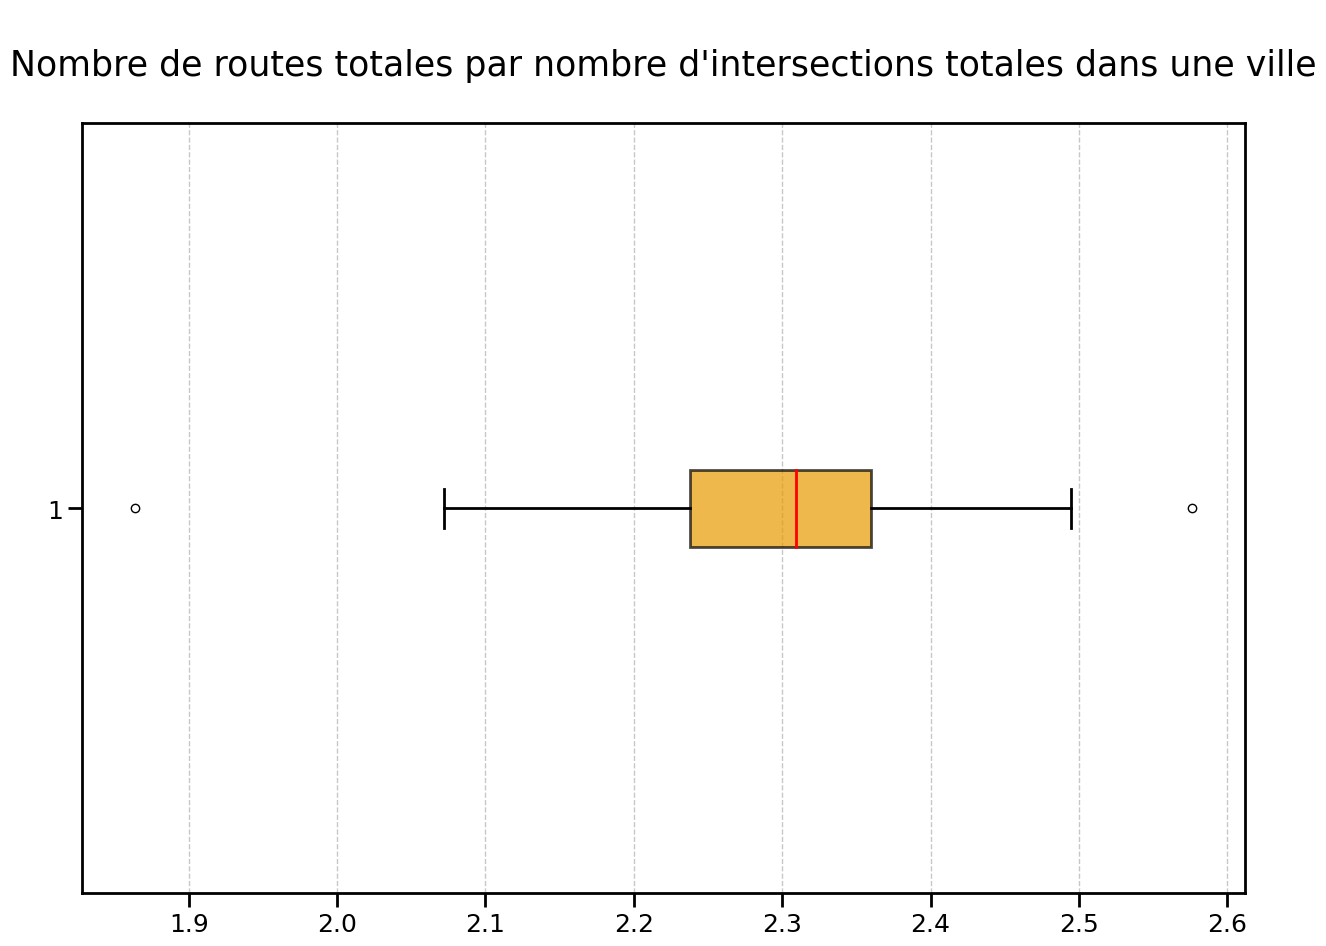

In [40]:
import matplotlib.pyplot as plt

# Création de la boîte à moustache horizontale
plt.figure(figsize=(15, 10))

# Ajout de la couleur et des marques pour les médianes
bp = plt.boxplot(df['edges/nodes_directed'], vert=False, widths=0.1, notch=False, medianprops=dict(color='red'), patch_artist=True)

# Ajout de couleurs aux boîtes
colors = ['#000000', '#000000']
for box, color in zip(bp['boxes'], colors):
    box.set(color=color, linewidth=2, alpha=0.7, facecolor='#E89A01')

# augmenter la taille des traits des boîtes
for whisker in bp['whiskers']:
    whisker.set(linewidth=2)
# augmenter la taille des traits des médianes
for median in bp['medians']:
    median.set(linewidth=2)
# augmenter la taille des traits des moustaches
for cap in bp['caps']:
    cap.set(linewidth=2)

#augmenter la taille des traits des axes
plt.tick_params(axis='x', which='major', labelsize=18, width=2, length=10)
plt.tick_params(axis='y', which='major', labelsize=18, width=2, length=10)

# Ajout de la grille
plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=1)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
    


# Affichage du graphique
plt.title("\nNombre de routes totales par nombre d'intersections totales dans une ville\n", fontsize=25, color='black', loc='center')
plt.show()

In [5]:
# Sort the dataframe by the ratio of edges to nodes
df.sort_values(by=['edges/nodes_directed'], inplace=True)
df[['map_name', 'edges/nodes_directed', 'edges/nodes_undirected', 'nodes_number']].head(20)

,map_name,edges/nodes_directed,edges/nodes_undirected,nodes_number
42,map_paris_centre,1.863780,1.222996,39216
31,map_lyon,2.072301,1.222383,29737
15,map_centre_toulouse,2.080136,1.276969,9409
45,map_rennes,2.095975,1.208079,20026
26,map_le_cailar,2.115385,1.162393,234
41,map_paris_banlieue_nord,2.125308,1.270474,8108
35,map_montpellier,2.130745,1.259385,8551
21,map_dinard,2.192228,1.215026,1930
36,map_montpellier_centre,2.194815,1.226237,1273
10,map_bignoux,2.211538,1.173077,156


In [6]:
print(df['edges/nodes_directed'].mean())
print(df['edges/nodes_directed'].std())

2.291059323350099
0.12238896954311242


On remarque que le nombre d'arrêtes en fonction du nombre de noeuds est toujours plus ou moins le même pour une ville peu importe sa taille, avec une valeur d'environ 2.3 arrêtes par noeud.

In [7]:
# Sort the dataframe by the density of the graph
df.sort_values(by=['density_directed'], inplace=True)
df[['map_name', 'density_directed', 'density_undirected', 'nodes_number']].head(20)

,map_name,density_directed,density_undirected,nodes_number
42,map_paris_centre,0.000048,0.000062,39216
12,map_bordeaux,0.000053,0.000061,41784
31,map_lyon,0.000070,0.000082,29737
45,map_rennes,0.000105,0.000121,20026
14,map_caen,0.000105,0.000118,21941
37,map_nancy,0.000111,0.000124,21146
4,map_angers,0.000126,0.000141,17716
40,map_orleans,0.000127,0.000142,17653
18,map_clermont_ferrand,0.000143,0.000164,15582
43,map_pau,0.000152,0.000168,15316


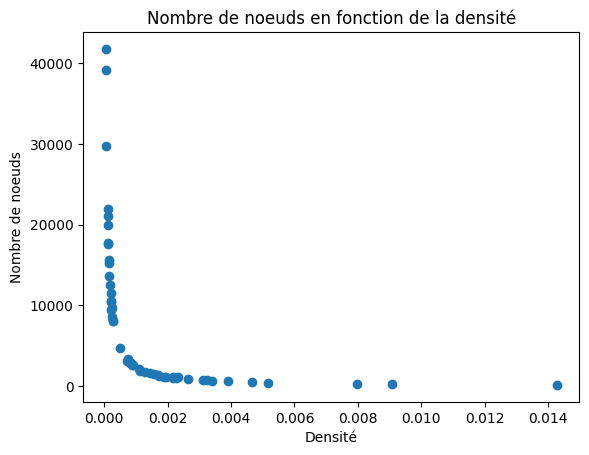

In [8]:
plt.plot(df['density_directed'],df['nodes_number'], 'o')
plt.xlabel('Densité')
plt.ylabel('Nombre de noeuds')
plt.title('Nombre de noeuds en fonction de la densité')
plt.show()

On remarque ici qu'il y a une forte corrélation entre le nombre de noeuds et la densité du graphe lorsqu'il s'agit d'une ville. Nous allons donc essayer de trouver une equation reliant ces deux valeurs. Il semble que cette corrélation soit de la forme $y = a*x^b$ avec $a$ et $b$ des constantes. Nous allons donc essayer de trouver ces constantes.

Slope: -1.015977    Intercept: 0.957488
R-squared: 0.998832
p_value: 0.000000
std_err: 0.004963

density = 2.605144 * nodes_number^-1.015977


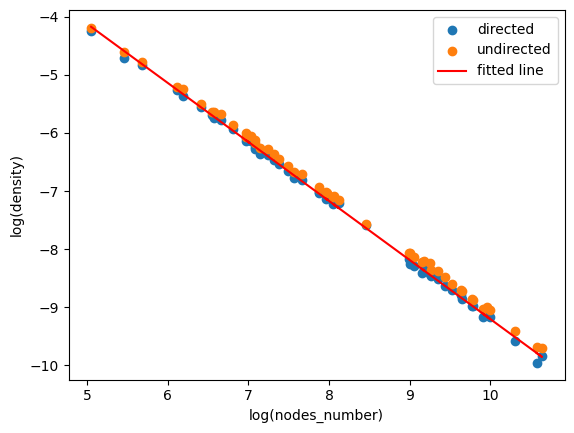

In [9]:
# calculer la courbe de tendance de la densité en fonction du nombre de noeuds sous forme puissance:
# density = a * nodes_number^b
# log(density) = log(a) + b * log(nodes_number)
# on calcule donc la courbe de tendance de log(density) en fonction de log(nodes_number)
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(np.log(df['nodes_number']), np.log(df['density_directed']))
print("Slope: %f    Intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("p_value: %f" % p_value)
print("std_err: %f" % std_err)
print()
print("density = %f * nodes_number^%f" % (np.exp(intercept), slope))

# graph the relation between density_directed, density_undirected and number of nodes
# the number of nodes is logaritmic
import matplotlib.pyplot as plt

plt.scatter(np.log(df['nodes_number']), np.log(df['density_directed']), label='directed')
plt.scatter(np.log(df['nodes_number']), np.log(df['density_undirected']), label='undirected')
plt.plot(np.log(df['nodes_number']), intercept + slope*np.log(df['nodes_number']), 'r', label='fitted line')
plt.xlabel('log(nodes_number)')
plt.ylabel('log(density)')
plt.legend()
plt.show()

Avec un $R^2$ de 0.998, on peut dire que la corrélation est très forte. 

Comme on a $density = card(edges)/(card(nodes)*(card(nodes)-1))$

Alors on peut dire que $card(edges) = density * card(nodes) * (card(nodes)-1) = 2.605 * card(nodes)^{-1.016} * card(nodes) * (card(nodes)-1)$

On peut alors s'attendre à ce qu'il y ait une corrélation entre le nombre d'arrêtes et le nombre de noeuds. Cependant on ne voit pas directement cette corrélation sur le graphe suivant. Cela est dû à la formule mathématique qui est très variable. Cependant comme déjà vu précédemment, ces valeurs tournent toutes autour de 2.3 arrêtes par noeud, une valeur qui nous sera utile par la suite.


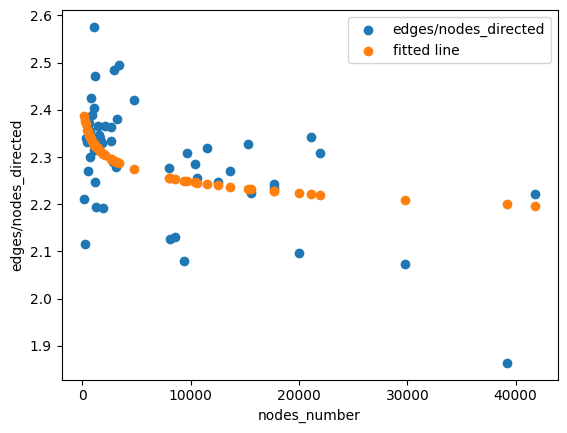

In [10]:
plt.scatter(df['nodes_number'], df['edges/nodes_directed'], label='edges/nodes_directed')
plt.scatter(df['nodes_number'], (df['nodes_number']-1)*2.605*(df['nodes_number']**(-1.016)), label='fitted line')
plt.xlabel('nodes_number')
plt.ylabel('edges/nodes_directed')
plt.legend()

In [11]:
# Calculate the average of the ratio of edges to nodes
print('Average of the ratio of edges to nodes in a directed graph: ', np.mean(df['edges/nodes_directed']))
print('Average of the ratio of edges to nodes in an undirected graph: ', np.mean(df['edges/nodes_undirected']))

Average of the ratio of edges to nodes in a directed graph:  2.2910593233500984
Average of the ratio of edges to nodes in an undirected graph:  1.2719006636889612


In [12]:
df['one_way_ratio'] = df['oneway_edges_number']/df['edges_number']
df['two_way_ratio'] = df['twoway_edges_number']/df['edges_number']

df[['map_name', 'one_way_ratio', 'two_way_ratio', 'edges_number']].sort_values(by=['one_way_ratio'], inplace=False)

,map_name,one_way_ratio,two_way_ratio,edges_number
49,map_villages_ouest_amiens,0.026207,0.973793,1450
2,map_alsace_vosges,0.034021,0.965979,5820
50,map_villages_strasbourg_ouest,0.078571,0.921429,3780
9,map_bellac,0.079532,0.920468,855
8,map_bavans,0.082337,0.917663,753
11,map_bischoffsheim,0.088889,0.911111,360
1,map_alsace_est,0.111960,0.888040,4448
7,map_barr,0.114286,0.885714,560
10,map_bignoux,0.114754,0.885246,183
17,map_chauvigny,0.125436,0.874564,1148


On remarque ici que la proportion de route a double sens est au dessus de 50% mais varie beaucoup d'une ville à l'autre, pouvant atteindre les 97%. C'est donc une variable que nous devront pouvoir spécifier lors de la génération de nos graphes.

On peut aussi s'intéresser plus spécifiquement au nombre de voisin de chaque noeud. On va donc créer un csv qui récolte toute les données pour nos 51 villes.

In [20]:
import os

df_neighbourhood = pd.DataFrame(columns=['map_name',
                                         'number_of_edges',
                                         'number_of_nodes',
                                         'neighbourhood_average',
                                         'neighbourhood_max',
                                         'neighbourhood_max_twoway_in',
                                         'neighbourhood_max_twoway_out',
                                         'neighbourhood_max_oneway_in',
                                         'neighbourhood_max_oneway_out',
                                         'neighbourhood_twoway_in_average',
                                         'neighbourhood_twoway_out_average',
                                         'neighbourhood_oneway_in_average',
                                         'neighbourhood_oneway_out_average',
                                         'neighbourhood_distribution'])


# pour chaque fichier dans le dossier map :
for file in os.listdir("../Sources/map"):
    if file[-13:] == "edge_list.csv":
        df = pd.read_csv("../Sources/map/"+file, sep=",")
        
        # chaque csv contient les colonnes node_id1,node_id2,speed,type,length
        nodes = pd.concat([df['node_id1'], df['node_id2']]).unique()
        number_of_nodes = len(nodes)
        number_of_edges = len(df)
        neighbourhood_average = 0
        neighbourhood_max = 0
        neighbourhood_max_twoway_in = 0
        neighbourhood_max_twoway_out = 0
        neighbourhood_max_oneway_in = 0
        neighbourhood_max_oneway_out = 0
        neighbourhood_twoway_in_average = 0
        neighbourhood_twoway_out_average = 0
        neighbourhood_oneway_in_average = 0
        neighbourhood_oneway_out_average = 0
        neighbourhood_distribution = np.zeros(15)
        for node in nodes:
            # on calcule le nombre de voisins de chaque noeud
            filtered_df = df[(df['node_id1'] == node) | (df['node_id2'] == node)]
            neighbourhood = len(pd.concat([filtered_df['node_id1'], filtered_df['node_id2']]).unique())-1
            neighbourhood_average += neighbourhood
            neighbourhood_distribution[neighbourhood] += 1
            # on calcule le nombre de voisins entrants et sortants de chaque noeud
            if len(df[(df['node_id1'] == node) & (df['type'] == 'twoway')]) > 0:
                neighbourhood_twoway_in_average += len(df[df['node_id2'] == node])
                neighbourhood_twoway_out_average += len(df[df['node_id1'] == node])
            elif len(df[(df['node_id1'] == node) & (df['type'] == 'oneway')]) > 0:
                neighbourhood_oneway_in_average += len(df[df['node_id2'] == node])
                neighbourhood_oneway_out_average += len(df[df['node_id1'] == node])
            # on calcule le maximum des voisins de chaque noeud
            neighbourhood_max = max(neighbourhood, neighbourhood_max)
            # condition selon le type 'twoway' ou 'oneway'
            if len(df[(df['node_id1'] == node) & (df['type'] == 'twoway')]) > 0:
                neighbourhood_max_twoway_out = max(neighbourhood, neighbourhood_max_twoway_out)
            elif len(df[(df['node_id1'] == node) & (df['type'] == 'oneway')]) > 0:
                neighbourhood_max_oneway_out = max(neighbourhood, neighbourhood_max_oneway_out)
            if len(df[(df['node_id2'] == node) & (df['type'] == 'twoway')]) > 0:
                neighbourhood_max_twoway_in = max(neighbourhood, neighbourhood_max_twoway_in)
            elif len(df[(df['node_id2'] == node) & (df['type'] == 'oneway')]) > 0:
                neighbourhood_max_oneway_in = max(neighbourhood, neighbourhood_max_oneway_in)
        
        neighbourhood_average /= number_of_nodes
        neighbourhood_twoway_in_average /= number_of_nodes
        neighbourhood_twoway_out_average /= number_of_nodes
        neighbourhood_oneway_in_average /= number_of_nodes
        neighbourhood_oneway_out_average /= number_of_nodes
        
        new_row = {'map_name': file[:-13],
                'number_of_edges': number_of_edges,
                'number_of_nodes': number_of_nodes,
                'neighbourhood_average': neighbourhood_average,
                'neighbourhood_max': neighbourhood_max,
                'neighbourhood_max_twoway_in': neighbourhood_max_twoway_in,
                'neighbourhood_max_twoway_out': neighbourhood_max_twoway_out,
                'neighbourhood_max_oneway_in': neighbourhood_max_oneway_in,
                'neighbourhood_max_oneway_out': neighbourhood_max_oneway_out,
                'neighbourhood_twoway_in_average': neighbourhood_twoway_in_average,
                'neighbourhood_twoway_out_average': neighbourhood_twoway_out_average,
                'neighbourhood_oneway_in_average': neighbourhood_oneway_in_average,
                'neighbourhood_oneway_out_average': neighbourhood_oneway_out_average,
                'neighbourhood_distribution': neighbourhood_distribution}

        df_neighbourhood = pd.concat([df_neighbourhood, pd.DataFrame([new_row])], ignore_index=True)
        print(file[:-14], 'done')

#enregistrer le dataframe dans un fichier csv
df_neighbourhood.to_csv('../Sources/neighbourhood.csv', index=False)

map_albert done
map_alsace_est done
map_alsace_vosges done
map_amiens done
map_angers done
map_auch done
map_auray done
map_barr done
map_bavans done
map_bellac done
map_bignoux done
map_bischoffsheim done
map_bordeaux done
map_brest done
map_caen done
map_centre_toulouse done
map_chateaubriant done
map_chauvigny done
map_clermont_ferrand done
map_dijon done
map_dinan done
map_dinard done
map_dorlisheim done
map_gerzat done
map_guingamp done
map_hericourt done
map_le_cailar done
map_limoges done
map_lingolsheim done
map_lorient done
map_lunel done
map_lyon done
map_marsillargues done
map_meaux done
map_molsheim done
map_montpellier_centre done
map_montpellier done
map_nancy done
map_nimes done
map_obernai done
map_orleans done
map_paris_banlieue_nord done
map_paris_centre done
map_pau done
map_poitiers done
map_rennes done
map_sommières done
map_strasbourg_centre done
map_test done
map_vauvert done
map_villages_ouest_amiens done
map_villages_strasbourg_ouest done


In [21]:
df_neighbourhood = pd.read_csv("../Sources/neighbourhood.csv", sep=",")
df_neighbourhood.head(15)

,map_name,number_of_edges,number_of_nodes,neighbourhood_average,neighbourhood_max,neighbourhood_max_twoway_in,neighbourhood_max_twoway_out,neighbourhood_max_oneway_in,neighbourhood_max_oneway_out,neighbourhood_twoway_in_average,neighbourhood_twoway_out_average,neighbourhood_oneway_in_average,neighbourhood_oneway_out_average,neighbourhood_distribution
0,map_albert_,1889,779,2.649551,5,5,5,4,4,2.342747,2.342747,0.079589,0.082157,[ 0. 145. 65. 491. 74. 4. 0. 0. 0. ...
1,map_alsace_est_,8398,3366,2.614379,5,5,5,4,4,2.446227,2.448010,0.047534,0.046940,[ 0. 745. 199. 2036. 381. 5. 0. ...
2,map_alsace_vosges_,11442,4725,2.445291,6,6,6,3,3,2.412487,2.412910,0.009101,0.008677,[ 0. 1334. 245. 2877. 249. 17. 3. ...
3,map_amiens_,22320,9665,2.632799,8,8,8,5,5,2.175272,2.174340,0.131816,0.135023,[0.000e+00 2.154e+03 6.180e+02 5.584e+03 1.251...
4,map_angers_,39571,17716,2.473922,7,7,7,6,6,2.131012,2.129826,0.099740,0.103804,[0.0000e+00 4.8410e+03 1.2480e+03 1.0099e+04 1...
5,map_auch_,6166,2642,2.476911,5,5,5,5,5,2.266843,2.266843,0.066238,0.066995,[ 0. 714. 177. 1536. 207. 8. 0. ...
6,map_auray_,5041,2130,2.566197,5,5,5,4,4,2.286385,2.291549,0.077465,0.075117,[ 0. 459. 186. 1310. 170. 5. 0. ...
7,map_barr_,1056,453,2.450331,5,5,5,3,3,2.289183,2.289183,0.041943,0.041943,[ 0. 115. 43. 272. 22. 1. 0. 0. 0. ...
8,map_bavans_,1444,609,2.456486,6,6,6,4,4,2.348112,2.346470,0.022989,0.024631,[ 0. 173. 29. 365. 41. 0. 1. 0. 0. ...
9,map_bellac_,1642,697,2.424677,4,4,4,3,3,2.344333,2.347202,0.008608,0.008608,[ 0. 202. 41. 410. 44. 0. 0. 0. 0. ...


In [22]:
# Calculer la moyenne et l'écart-type pour chaque colonne
df_neighbourhood_copy = df_neighbourhood.drop(columns=['map_name', 'number_of_edges', 'number_of_nodes', 'neighbourhood_distribution'])

means = df_neighbourhood_copy.mean()
std_devs = df_neighbourhood_copy.std()

# Afficher les résultats
for col in df_neighbourhood_copy.columns:
    print(f"{col}:")
    print(f"   Moyenne: {means[col]}")
    print(f"   Écart-type: {std_devs[col]}")
    print()

neighbourhood_average:
   Moyenne: 2.511199938381784
   Écart-type: 0.08465258245711248

neighbourhood_max:
   Moyenne: 6.019230769230769
   Écart-type: 1.488391480963029

neighbourhood_max_twoway_in:
   Moyenne: 5.9423076923076925
   Écart-type: 1.474135992056677

neighbourhood_max_twoway_out:
   Moyenne: 5.9423076923076925
   Écart-type: 1.474135992056677

neighbourhood_max_oneway_in:
   Moyenne: 4.6923076923076925
   Écart-type: 1.7991115622086924

neighbourhood_max_oneway_out:
   Moyenne: 4.6923076923076925
   Écart-type: 1.7991115622086924

neighbourhood_twoway_in_average:
   Moyenne: 2.197995583587315
   Écart-type: 0.18068886740033605

neighbourhood_twoway_out_average:
   Moyenne: 2.198041550519201
   Écart-type: 0.18045207825597076

neighbourhood_oneway_in_average:
   Moyenne: 0.09179104001367386
   Écart-type: 0.06866782515194189

neighbourhood_oneway_out_average:
   Moyenne: 0.0944272289253875
   Écart-type: 0.07043211062190564



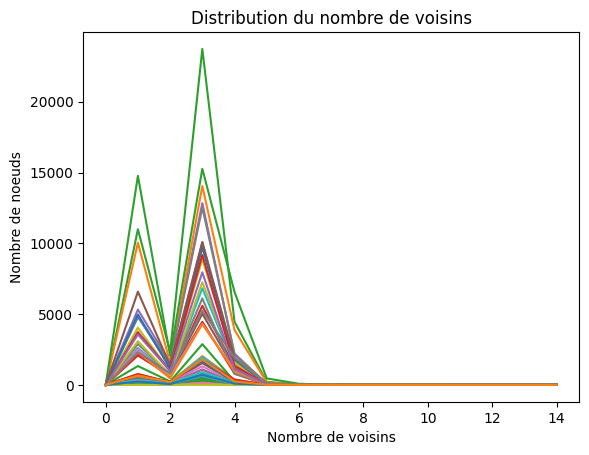

[0, 108272, 25019, 212947, 43159, 1978, 299, 62, 17, 1, 1, 0, 0, 0, 0]


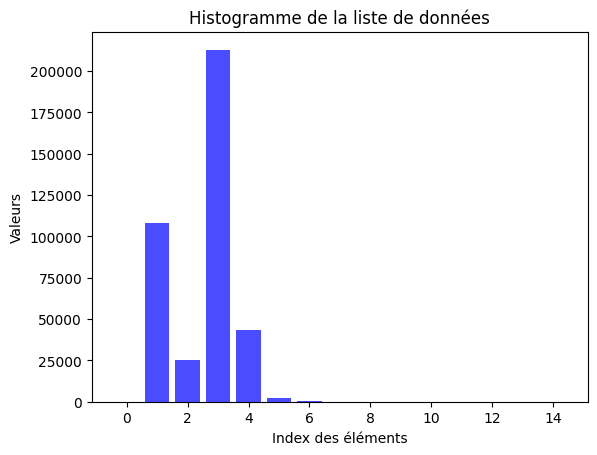

In [31]:
# add the list of neighbourhood_distribution in the dataframe to plot it
df_neighbourhood = pd.read_csv("../Sources/neighbourhood.csv", sep=",")

L = []
# pour chaque ligne du dataframe :
for i in range(len(df_neighbourhood)):
    # on récupère la liste de distribution des voisins
    l = df_neighbourhood['neighbourhood_distribution'][i]
    # on transforme la liste de string en liste d'entiers
    l = l[1:-1].split()
    l = [int(float(i)) for i in l]
    # on ajoute la liste à la liste L
    L.append(l)

for i in range(len(L)):
    plt.plot(range(len(L[i])), L[i], label=df_neighbourhood['map_name'][i])
plt.xlabel('Nombre de voisins')
plt.ylabel('Nombre de noeuds')
plt.title('Distribution du nombre de voisins')
plt.show()


T = L[0]
#add  all the lists of neighbourhood_distribution in one list
for i in range(1, len(L)):
    T = [T[j] + L[i][j] for j in range(len(L[i]))]
print(T)

# Créer un diagramme à barres
plt.bar(range(len(T)), T, color='blue', alpha=0.7)
# Ajouter des étiquettes et un titre
plt.title('Histogramme de la liste de données')
plt.xlabel('Index des éléments')
plt.ylabel('Valeurs')

# Afficher le diagramme à barres
plt.show()



In [141]:
df_neighbourhood = pd.read_csv("../Sources/neighbourhood3.csv", sep=",")

for i in range(len(df_neighbourhood)):
    # on récupère la liste de distribution des voisins
    l = df_neighbourhood['neighbourhood_distribution'][i]
    # on transforme la liste de string en liste d'entiers
    l = l[1:-1].split()
    # on ajoute la liste à la liste L
    L = [int(float(i)) for i in l]
    total = sum(L)
    df_neighbourhood['neighbourhood_distribution'][i] = L[5]/total

df_neighbourhood[['neighbourhood_distribution', 'map_name', 'number_of_nodes']].sort_values(by=['neighbourhood_distribution'], ascending=False)
    

C:\Users\helle\AppData\Local\Temp\ipykernel_23488\3618197851.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neighbourhood['neighbourhood_distribution'][i] = L[5]/total


,neighbourhood_distribution,map_name,number_of_nodes
47,0.185578,map_strasbourg_centre_,10373
42,0.167355,map_paris_centre_,39216
35,0.132757,map_montpellier_centre_,1273
31,0.130275,map_lyon_,29737
3,0.129436,map_amiens_,9665
34,0.124561,map_molsheim_,1140
41,0.121485,map_paris_banlieue_nord_,8108
15,0.119685,map_centre_toulouse_,9408
33,0.119451,map_meaux_,3131
36,0.118933,map_montpellier_,8551


Le but est ici de générer un graph qui se rapprocherait au plus d'un graph représentant un réseau routier d'une ville. On est à présent capable de déterminer la densité d'un tel graph en fonction du nombre de noeud voulu pour ce graph.

Avec ce nouveau csv, on est maintenant capable d'approximer pour chaque noeuds combien de route à double sens et combien de route à sens unique y rentre et en sortent. 